# Exploratory Data Analysis

# Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Create a sample DataFrame
data = {
    'age': np.random.randint(18, 70, size=100),
    'salary': np.random.randint(30000, 100000, size=100),
    'department': np.random.choice(['Sales', 'Engineering', 'HR', 'Marketing'], size=100),
    'gender': np.random.choice(['Male', 'Female'], size=100),
    'years_of_experience': np.random.randint(1, 30, size=100)
}

df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head(5))

   age  salary department  gender  years_of_experience
0   56   91228         HR  Female                   10
1   69   78984  Marketing    Male                    2
2   46   70774  Marketing  Female                   26
3   32   32568      Sales    Male                   17
4   60   92592      Sales  Female                    8


Important Considerations
    - The question (and how many variables that question involves)
    - The data (is it quantitative or categorical?)

Univariate Statistics
    - Summary statistics that focus on a single variable are called univariate statistics


Quantitative Variables
    - When summarizing quantitative variables, we often want to describe central location and spread.


Bivariate Statistics
    - In contrast to univariate statistics, bivariate statistics are used to summarize the relationship between two variables

Key objectives of EDA:
    • Detecting mistakes
    • Understanding patterns in the data
    • Identifying relationships between variables
    • Spotting anomalies or outliers

##### df.describe

df.describe gives the basic statistics of the dataframe (mean, median, mode, etc)


In [2]:
df.describe()

,age,salary,years_of_experience
count,100.000000,100.000000,100.000000
mean,43.350000,67758.110000,16.100000
std,14.904663,21128.310944,8.490637
min,19.000000,30206.000000,1.000000
25%,31.750000,51971.750000,9.000000
50%,42.000000,69428.500000,17.000000
75%,57.000000,85182.000000,23.000000
max,69.000000,99163.000000,29.000000


# Relationship Between Variables

### Correlation

Correlation measures the strength and direction of a linear relationship between two variables. It ranges from -1 to 1:
- 1: Perfect positive correlation (as one variable increases, so does the other)
- -1: Perfect negative correlation (as one increases, the other decreases)
- 0: No correlation (no relationship between the variables)

##### Finding correlation with numpy `df.corr()`

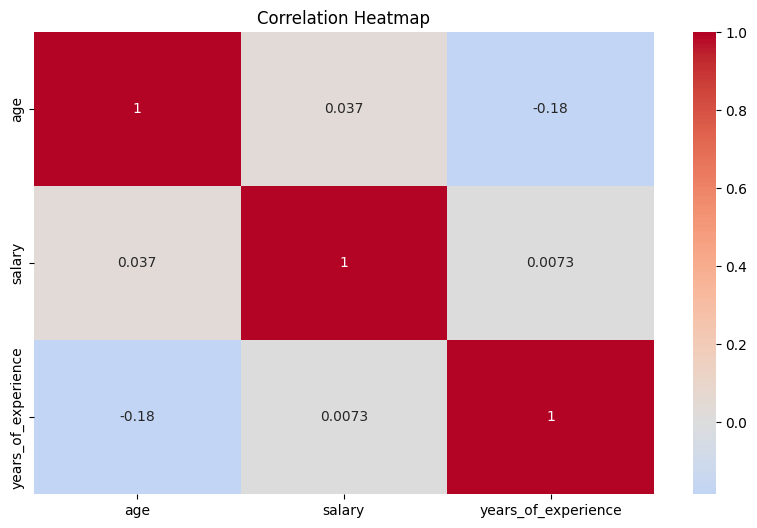

In [3]:
# Calculate the correlation matrix for numerical columns only
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Explanation:
- Data Creation:

We generate random data for three numerical variables: age, salary, and years_of_experience.
We also generate a categorical variable: department.

- Filtering Numerical Data:

`df.select_dtypes(include=[np.number])` filters the DataFrame to include only numerical columns (since correlation only works with numerical data)

- Correlation Matrix Calculation:

`numerical_df.corr()` computes the pairwise correlation of numerical columns.

- Heatmap Visualization:

`sns.heatmap()` creates a heatmap of the correlation matrix.
annot=True displays the correlation coefficients in the heatmap cells.
cmap='coolwarm' uses a color palette where cool colors represent negative correlations and warm colors represent positive correlations.
center=0 centers the colormap at zero, so correlations close to zero will have a neutral color.
Running this code will generate a heatmap showing the correlation between age, salary, and years_of_experience, ignoring the categorical department column.

In [4]:
#without heat map, just printed
corr_matrix

,age,salary,years_of_experience
age,1.000000,0.037341,-0.184580
salary,0.037341,1.000000,0.007306
years_of_experience,-0.184580,0.007306,1.000000


##### Finding correlation with scipy `pearson()`

In [5]:
from scipy.stats import pearsonr

x = [1, 2, 3, 4]
y = [4, 3, 2, 1]

corr_coefficient, p_value = pearsonr(x, y)
print(f'Correlation Coeficcient:\n{corr_coefficient}\n')
print(f'p value:\n{p_value}')

Correlation Coeficcient:
-0.9999999999999999

p value:
0.0


- Summary

    - Use `.corr()` for calculating correlations within pandas DataFrames or Series, especially when dealing with multiple variables.
    - Use `pearsonr()` when you need to calculate and assess the significance of the Pearson correlation coefficient between two specific data arrays.

##### Interpreting Correlation Results

When interpreting correlation results from .corr() and pearsonr(), here's what you typically look for:

`.corr()`
- corr() Method (Pandas DataFrame)
    - Range: The correlation coefficient ranges from -1 to 1.
    - 1: Perfect positive correlation (variables move in the same direction).
    - -1: Perfect negative correlation (variables move in opposite directions).
    - 0: No linear correlation.

- Typical Values:
    - Strong Correlation: |correlation coefficient| ≥ 0.7
    - Moderate Correlation: 0.3 ≤ |correlation coefficient| < 0.7
    - Weak Correlation: |correlation coefficient| < 0.3


`pearson()`
- Output
    -   Correlation Coefficient (r): Similar to the .corr() method, ranging from -1 to 1.
    -   P-value: Measures the significance of the correlation coefficient. A smaller p-value (typically < 0.05) indicates a statistically significant correlation.

- Typical Interpretation:

    - Strong Correlation: Correlation coefficient (r) ≥ 0.7 or ≤ -0.7
    - Moderate Correlation: 0.3 ≤ |r| < 0.7
    - Weak Correlation: |r| < 0.3

    - Significance:
        - ***Low P-Value (typically < 0.05):*** The observed correlation is unlikely to have occurred by chance. You can reject the null hypothesis, which states there is no correlation. This means the correlation is statistically significant.
        - ***High P-Value (typically ≥ 0.05):*** The observed correlation could have occurred by chance. You fail to reject the null hypothesis, meaning there isn't enough evidence to conclude the correlation is statistically significant.

https://www.codecademy.com/paths/data-science-foundations/tracks/dsf-exploratory-data-analysis-python/modules/dsf-summarizing-relationship-between-features/lessons/analyzing-associations-two-quantitative-variables/exercises/examining-x-y-plotting

### Scatter Plots

Another common way to visualize relationships between data is with scatter plots. A scatter plot displays points that represent the values of two different numerical variables. One variable is plotted along the x-axis and the other along the y-axis.

Scatter plot with matplotlib

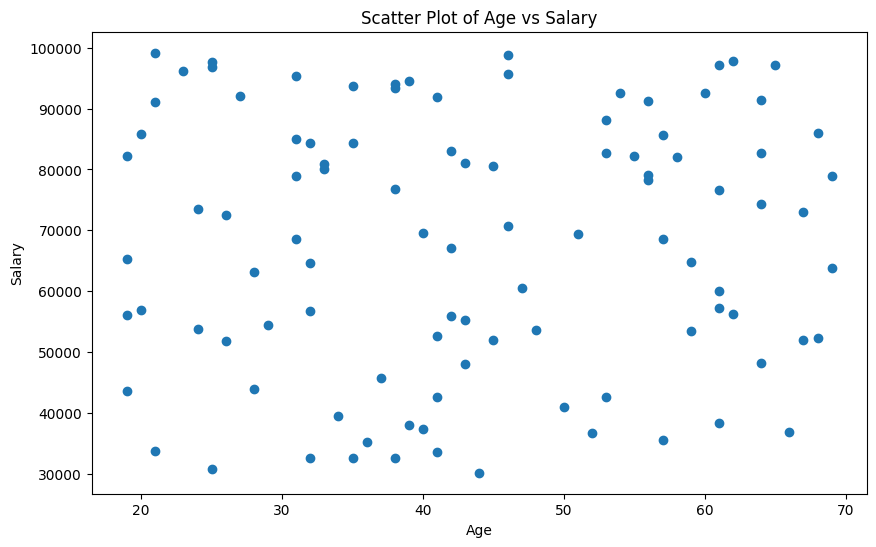

In [6]:
# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['salary'])
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

Scatter plot with seaborn

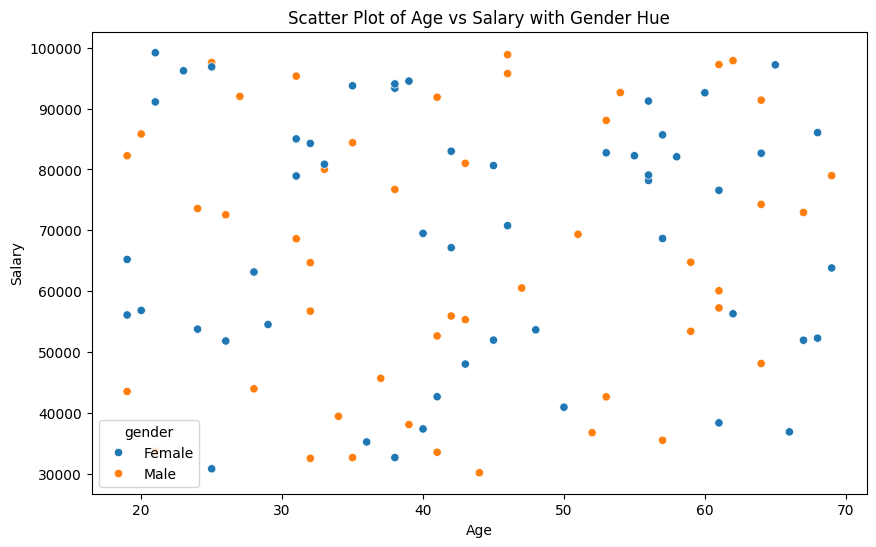

In [7]:
# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='salary', hue='gender')
plt.title('Scatter Plot of Age vs Salary with Gender Hue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Contingency Tables

A contingency table, also known as a cross-tabulation or crosstab, is a type of table in a matrix format that displays the frequency distribution of variables. They are particularly useful for understanding the relationship between two categorical variables.

#### Creating a Contingency Table in Pandas

In [8]:
# Creating a contingency table for 'department' and 'gender'
contingency_table = pd.crosstab(df['department'], df['gender'])
print(contingency_table)

gender       Female  Male
department               
Engineering      12     6
HR               10    14
Marketing        18    18
Sales            12    10


Explanation:
- **Contingency Table**: `pd.crosstab(df['department'], df['gender'])` creates a contingency table showing the frequency distribution between `department` and `gender`.
- The table helps to see the relationship between `department` and `gender` by showing how many males and females are in each department.

#### Visualizing Contingency Tables

While contingency tables themselves are useful, visualizing them can make it easier to understand the data. Here’s an example of how to visualize a contingency table using a heatmap from the seaborn library:

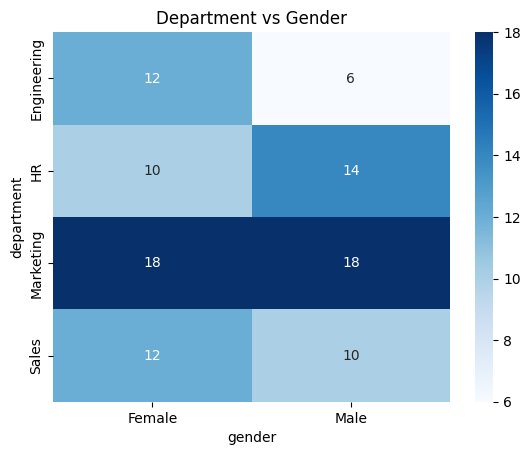

In [9]:
# Plot the heatmap
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Department vs Gender')
plt.show()

This heatmap provides a visual representation of the contingency table, where the color intensity represents the frequency of occurrences.

#### Proportions

To get the proprotions instead of frequencies

In [10]:
proportions = contingency_table / contingency_table.sum().sum()
proportions

gender,Female,Male
department,,
Engineering,0.12,0.06
HR,0.10,0.14
Marketing,0.18,0.18
Sales,0.12,0.10


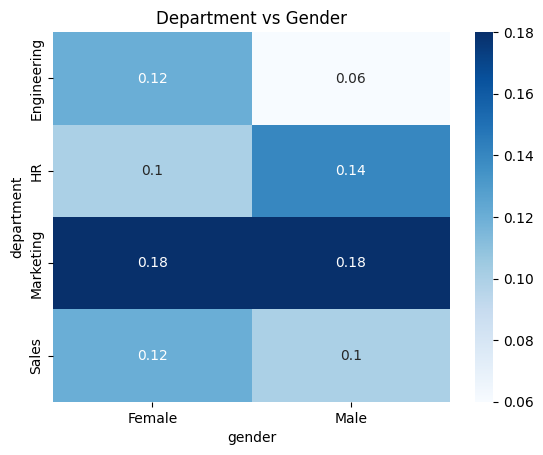

In [11]:
# Plot the heatmap
sns.heatmap(proportions, annot=True, cmap='Blues')
plt.title('Department vs Gender')
plt.show()

# Marginal Totals

Marginal totals, also known as marginal frequencies, are used in contingency tables to summarize the totals for each row and column. They provide a way to understand the overall distribution of data in relation to each category.

### What are Marginal Totals?

Marginal totals are the sums of the frequencies in the rows and columns of a contingency table. They give insights into the overall distribution and totals for each category of the variables.

#### Calculating Marginal Totals in Pandas

In [12]:
# Calculate marginal totals for rows and columns
marginal_totals_rows = contingency_table.sum(axis=1)
marginal_totals_columns = contingency_table.sum(axis=0)

print("Marginal Totals (Rows):\n", marginal_totals_rows)
print("\nMarginal Totals (Columns):\n", marginal_totals_columns)

Marginal Totals (Rows):
 department
Engineering    18
HR             24
Marketing      36
Sales          22
dtype: int64

Marginal Totals (Columns):
 gender
Female    52
Male      48
dtype: int64


Explanation:
- **Marginal Totals (Rows):** The sum of each row in the contingency table. This shows the total count for each level of the row variable (e.g., total number of males and females across all departments).
- **Marginal Totals (Columns):** The sum of each column in the contingency table. This shows the total count for each level of the column variable (e.g., total number of people in each department).

#### Visualizing Marginal Totals

Marginal totals can be visualized to better understand their distribution. One way to visualize them is by plotting them as bar charts.

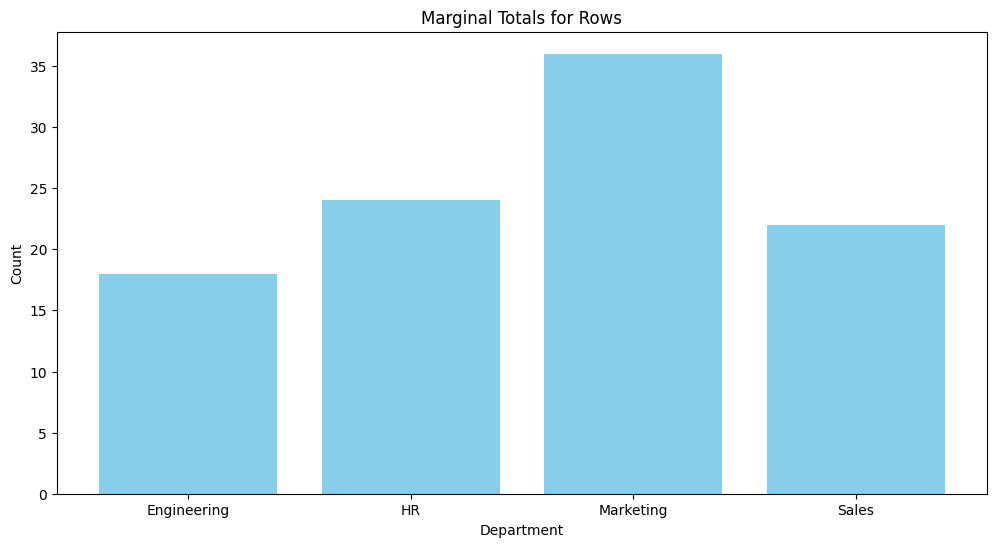

In [13]:
# Plot marginal totals for rows
plt.figure(figsize=(12, 6))
plt.bar(marginal_totals_rows.index, marginal_totals_rows.values, color='skyblue')
plt.title('Marginal Totals for Rows')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

Plot marginal totals for columns

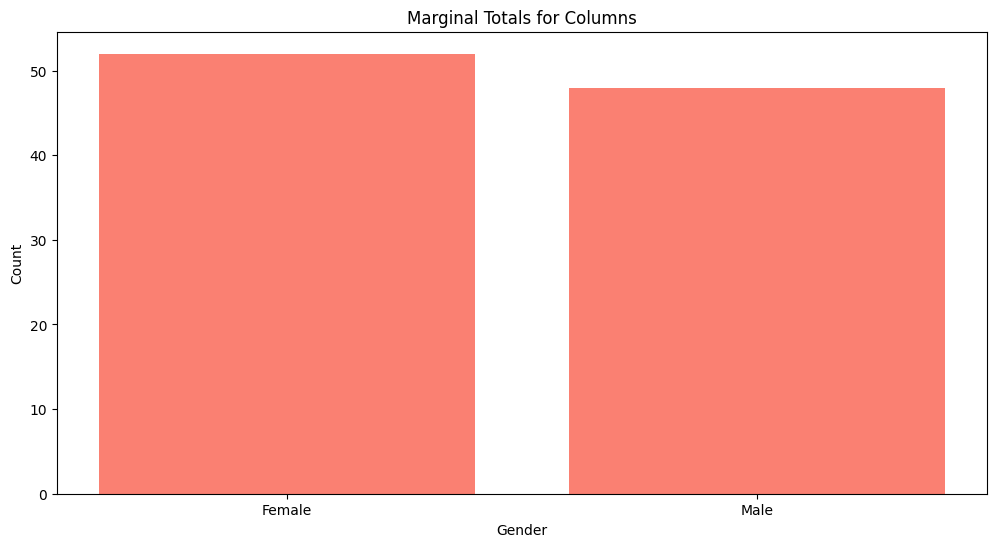

In [14]:
# Plot marginal totals for columns
plt.figure(figsize=(12, 6))
plt.bar(marginal_totals_columns.index, marginal_totals_columns.values, color='salmon')
plt.title('Marginal Totals for Columns')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Summary

Marginal totals provide a concise summary of the total counts for each category in a contingency table. They are helpful for understanding the overall distribution of each variable and can reveal important insights about the data's structure. By examining both row and column marginal totals, you can gain a clearer picture of the relationship between the variables and the overall frequencies within each category.

Understanding marginal totals is a fundamental aspect of analyzing categorical data and can assist in identifying trends and patterns that may not be immediately apparent from the raw contingency table alone.

# Chi-Square Statistic

The chi-square statistic is a test used to determine whether there is a significant association between two categorical variables. It compares the observed frequencies in a contingency table with the frequencies we would expect if there were no association between the variables.

### What is the Chi-Square Statistic?

The chi-square statistic measures how much the observed counts in a contingency table deviate from the expected counts. The formula for the chi-square statistic is:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

where:
- \( O_i \) = observed frequency for cell \( i \)
- \( E_i \) = expected frequency for cell \( i \)
- The sum is over all cells in the contingency table.

### Calculating the Chi-Square Statistic in Python

To calculate the chi-square statistic, you need to compute the observed and expected frequencies, then apply the chi-square formula. You can use the `scipy.stats` library to perform the chi-square test.

In [15]:
from scipy.stats import chi2_contingency

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic:\n{chi2_stat}\n')
print(f'P-Value:\n{p_value}\n')
print(f'Degrees of Freedom:\n{dof}\n')
print(f'Expected Frequencies:\n{expected}\n')
#print(f'Contingency Table:\n{contingency_table}\n')

Chi-Square Statistic:
2.6927933177933188

P-Value:
0.4414533841072992

Degrees of Freedom:
3

Expected Frequencies:
[[ 9.36  8.64]
 [12.48 11.52]
 [18.72 17.28]
 [11.44 10.56]]



Explanation:
- **Chi-Square Statistic (chi2_stat):** Indicates the degree of deviation of the observed frequencies from the expected frequencies. A higher value suggests a greater deviation.
- **P-Value (p_value):** Measures the probability of observing a chi-square statistic as extreme as the one calculated, assuming the null hypothesis is true. A smaller p-value indicates a stronger evidence against the null hypothesis.
- **Degrees of Freedom (dof):** Number of independent values or quantities which can be assigned to a statistical distribution. For a contingency table, it's calculated as (number of rows - 1) * (number of columns - 1).
- **Expected Frequencies (expected):** Frequencies that would be expected if there were no association between the variables.

### Interpreting the Chi-Square Test Results

- **Chi-Square Statistic:** A large chi-square statistic indicates that the observed frequencies differ significantly from the expected frequencies.
- **P-Value:** 
    - A p-value less than 0.05 (or your chosen significance level) suggests rejecting the null hypothesis. This implies that there is a significant association between the variables.
    - A p-value greater than 0.05 suggests that there is not enough evidence to reject the null hypothesis, implying that any observed differences might be due to chance.
- **Degrees of Freedom:** Helps in determining the chi-square distribution to use for interpreting the test statistic.

### Summary

The chi-square statistic is a powerful tool for testing associations between categorical variables. By comparing observed frequencies to expected frequencies, it helps determine if there is a significant relationship between the variables. Interpreting the chi-square statistic, along with the p-value, allows you to assess